In [3]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Importation du fichier de scraping
df = pd.read_csv('vgsales_scraping.csv')
#print(df.isnull().sum())

# Scraping Metascore
# On recherche les nombres dans Metascore correspond respectivement à la note et au nombre de vote
r = re.compile(r"[0-9]+")

# On crée les 2 conteneurs qui vont recueillir ces infos
metascorewrap_note = []
metascorewrap_nbvote = []
count = 0

for i in df['metascorewrap']:
    metascorewrap = r.findall(i)
    if len(metascorewrap)>1 :
        #print(count," : ",metascorewrap)
        #print(type(metascorewrap_note))
        metascorewrap_note.append(metascorewrap[0])
        metascorewrap_nbvote.append(metascorewrap[1])
    else :
        metascorewrap_note.append(np.nan)
        metascorewrap_nbvote.append(np.nan)
    count+=1
    
# On recherche les floats dans Userscore correspond respectivement à la note et au nombre de vote
r = re.compile(r"[0-9]+\.?[0-9]+")

# On crée les 2 conteneurs qui vont recueillir ces infos
userscorewrap_note = []
userscorewrap_nbvote = []
count = 0
df['metaNote']=metascorewrap_note
df['metaNbVote']=metascorewrap_nbvote

for i in df['userscorewrap']:
    userscorewrap = r.findall(i)
    if len(userscorewrap)>1 :
        #print(count," : ",userscorewrap)
        #print(type(metascorewrap_note))
        userscorewrap_note.append(userscorewrap[0])
        userscorewrap_nbvote.append(userscorewrap[1])
    else :
        userscorewrap_note.append(np.nan)
        userscorewrap_nbvote.append(np.nan)
    count+=1
df['userNote']=userscorewrap_note
df['userNbVote']=userscorewrap_nbvote
    
# Comparatif entre le nom du dataset et le nom sur Metacritic
samename = []
for i,j in zip(df['Name'],df['gamename']):
    if (i in j) or (j in i) : # Je fais le test dans les 2 sens, voir index 16595
        samename.append(1)
    else :
        samename.append(0)
df['samename']=samename

#print(df['metascorewrap'][52])
#print(df['userscorewrap'][0])

df=df.drop(['metascorewrap','developper','userscorewrap','gamename','nbvotes','description','top','nbratings','metascore','ratings'],axis=1)

# Calcul du nombre de bons jeux (même nom) trouvés
print(df['samename'].value_counts())
print("length :",len(df))

# Suppression des mauvais jeux (pas le même nom)
df.drop(df.loc[df['samename']==0].index, inplace=True)

1    11540
0     5058
Name: samename, dtype: int64
length : 16598


In [4]:
# Recherche des données manquantes
df.isnull().sum()

# Duplication de df dans df_visu pour les visualisations
df_visu = df

# Remplacement des années manquantes par 0 (autres)
df_visu[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df_visu[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)

# Remplacement des Publishers manquants par unknown
df_visu['Publisher'] = df['Publisher'].fillna('unknown')

#print(df_visu.isnull().sum())
#df_visu.head(20)

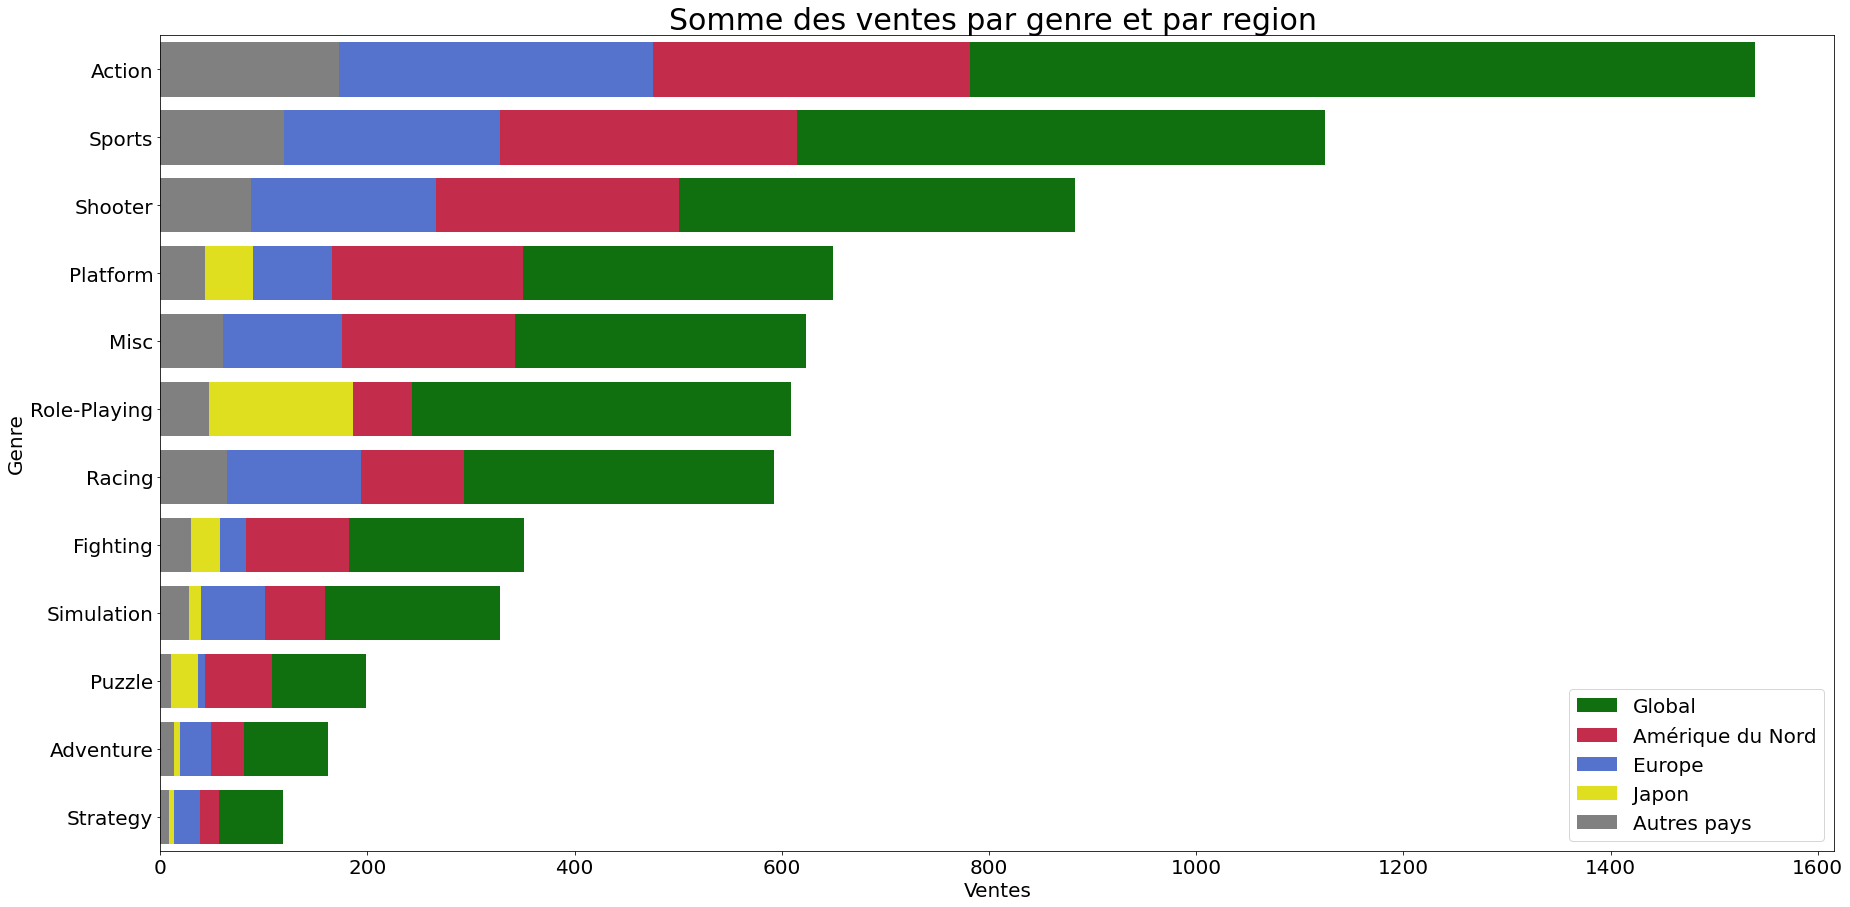

In [40]:
salesByGenre = df_visu.groupby('Genre')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)\
.reset_index()

liste_genre=salesByGenre.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,15))
columns=salesByGenre.columns.drop(['Genre'])

sns.barplot(data=salesByGenre, y='Genre', x='Global_Sales',color='green',label='Global')
sns.barplot(data=salesByGenre, y='Genre', x='NA_Sales',color='crimson',label='Amérique du Nord')
sns.barplot(data=salesByGenre, y='Genre', x='EU_Sales',color='royalblue',label='Europe')
sns.barplot(data=salesByGenre, y='Genre', x='JP_Sales',color='yellow',label='Japon')
sns.barplot(data=salesByGenre, y='Genre', x='Other_Sales',color='gray',label='Autres pays')

plt.ylabel('Genre',fontsize=20)
plt.xlabel('Ventes',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Somme des ventes par genre et par region ', fontsize=30)
plt.legend(fontsize=20);



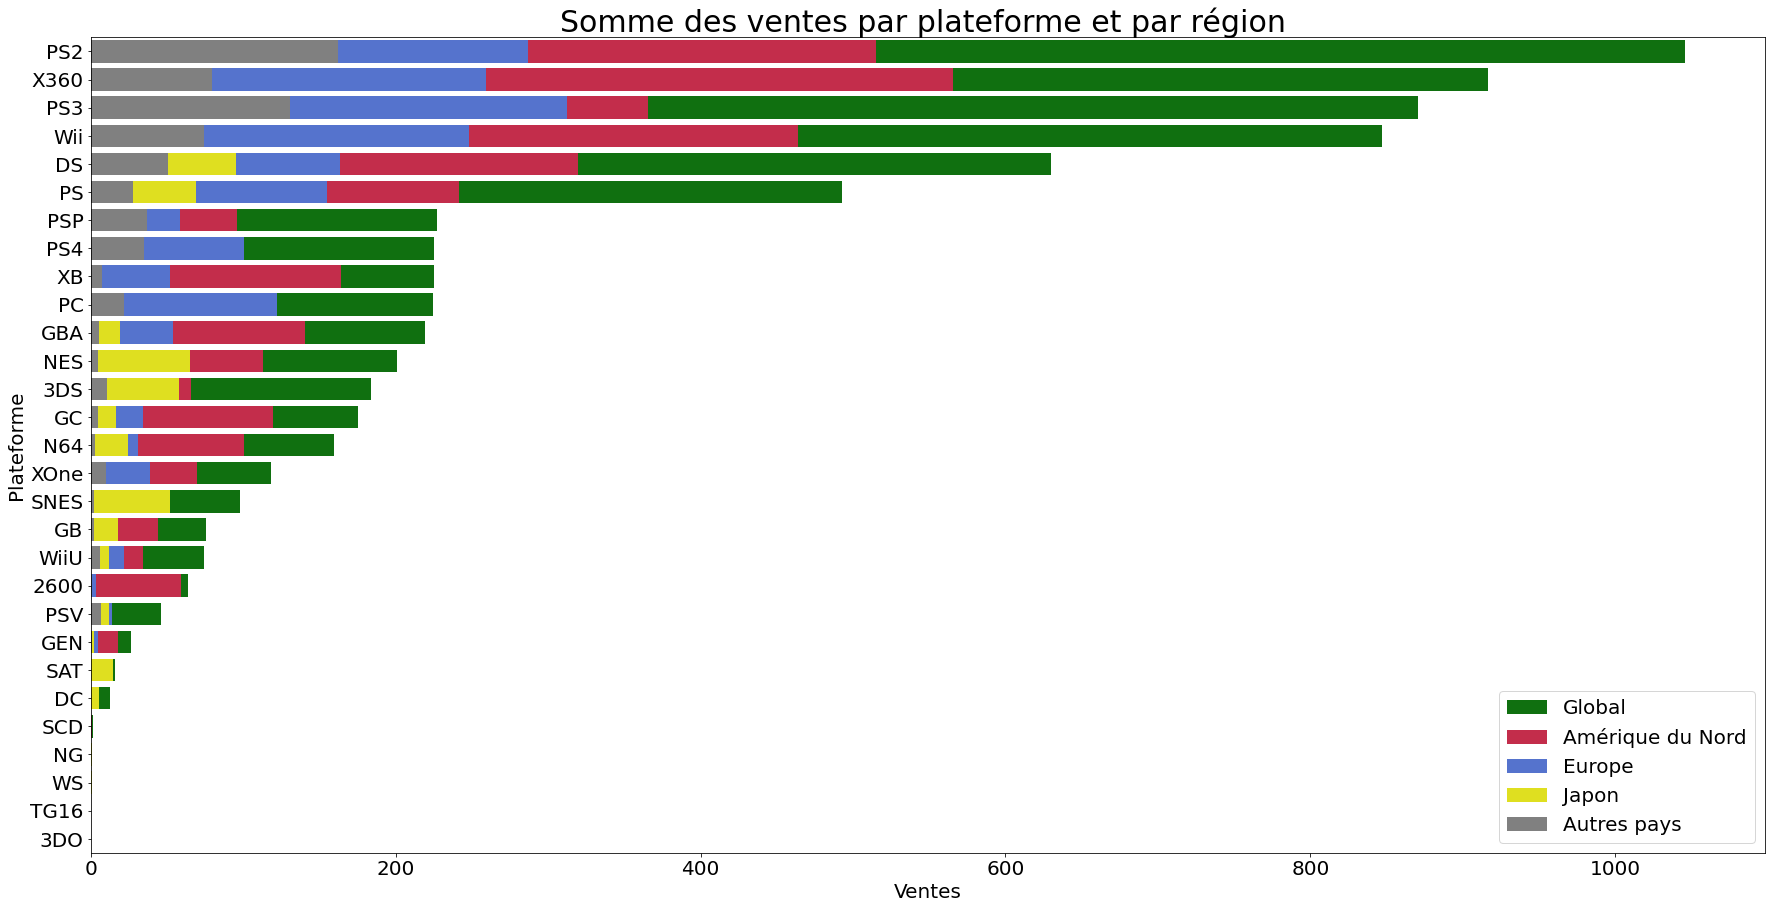

In [51]:
salesByPlatform = df_visu.groupby('Platform')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)\
.reset_index()

plt.figure(figsize = (30,15))

sns.barplot(data=salesByPlatform, y='Platform', x='Global_Sales',color='green',label='Global')
sns.barplot(data=salesByPlatform, y='Platform', x='NA_Sales',color='crimson',label='Amérique du Nord')
sns.barplot(data=salesByPlatform, y='Platform', x='EU_Sales',color='royalblue',label='Europe')
sns.barplot(data=salesByPlatform, y='Platform', x='JP_Sales',color='yellow',label='Japon')
sns.barplot(data=salesByPlatform, y='Platform', x='Other_Sales',color='grey',label='Autres pays')

plt.ylabel('Plateforme',fontsize=20)
plt.xlabel('Ventes',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Somme des ventes par plateforme et par région ', fontsize=30)
plt.legend(fontsize=20);

#salesByPlatform

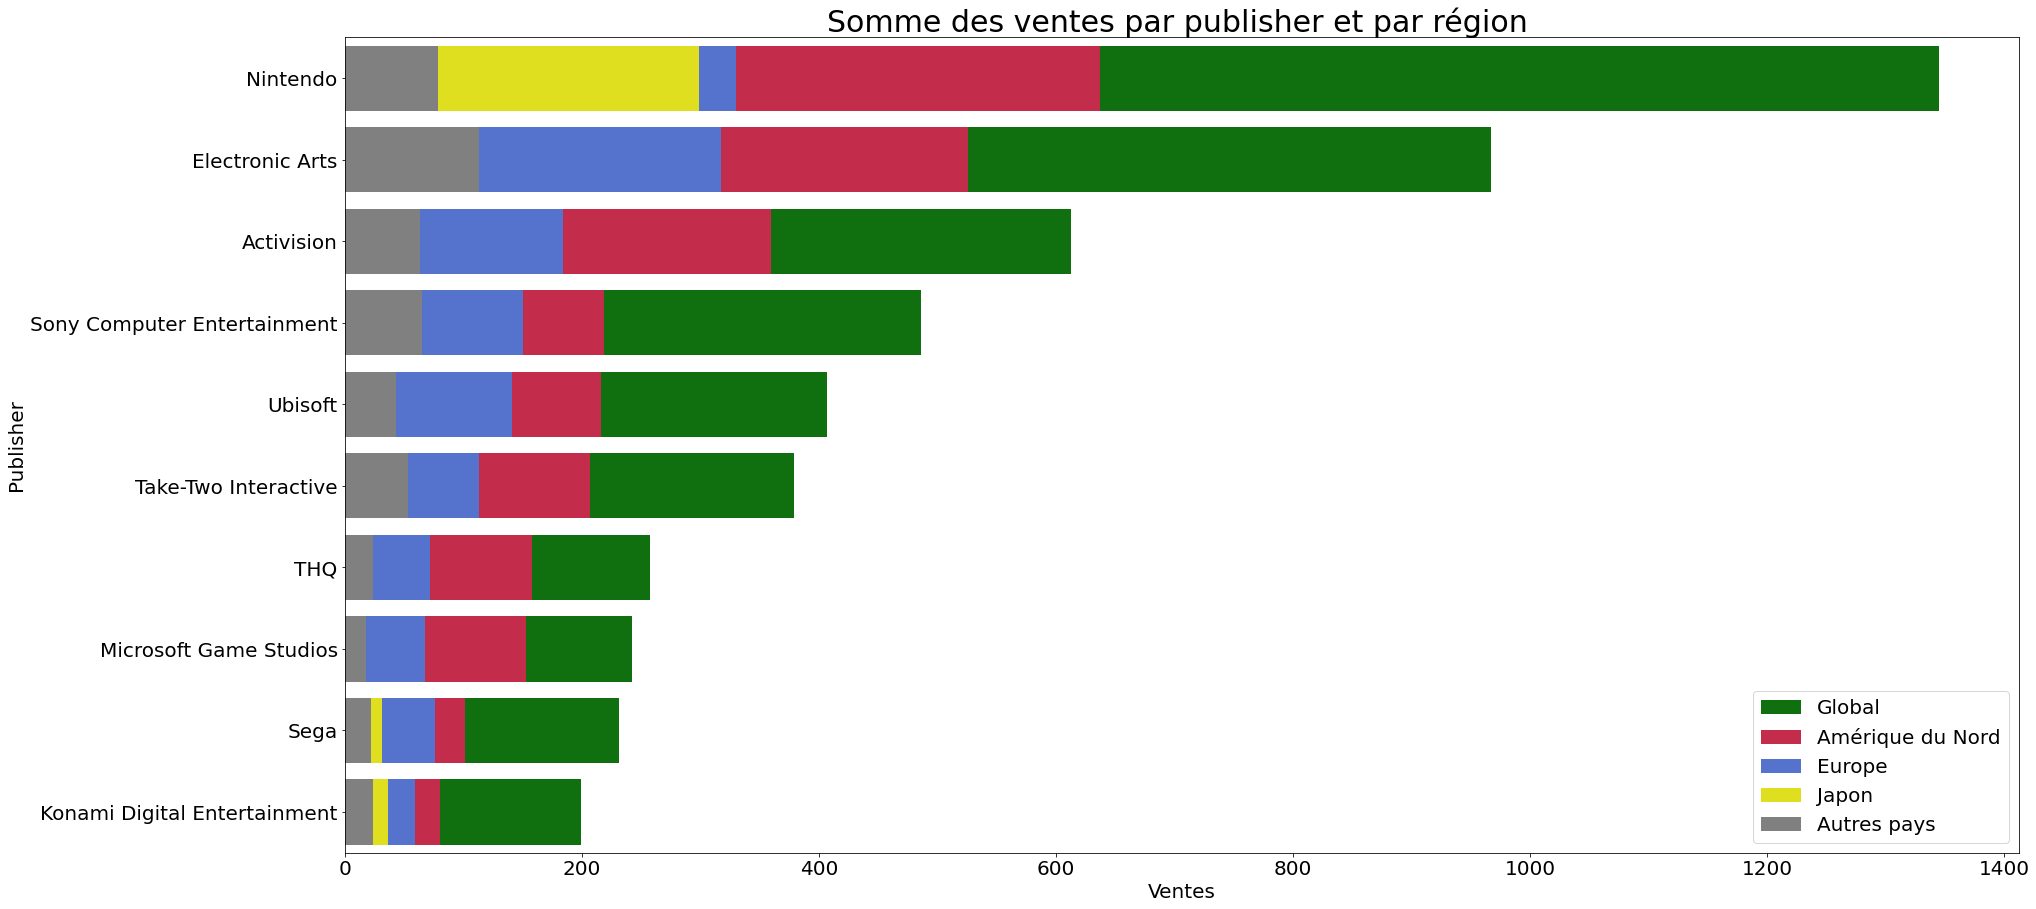

In [48]:
salesByPublisher = df_visu.groupby('Publisher')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)\
.reset_index().head(10)

plt.figure(figsize = (30,15))

sns.barplot(data=salesByPublisher, y='Publisher', x='Global_Sales',color='green',label='Global')
sns.barplot(data=salesByPublisher, y='Publisher', x='NA_Sales',color='crimson',label='Amérique du Nord')
sns.barplot(data=salesByPublisher, y='Publisher', x='EU_Sales',color='royalblue',label='Europe')
sns.barplot(data=salesByPublisher, y='Publisher', x='JP_Sales',color='yellow',label='Japon')
sns.barplot(data=salesByPublisher, y='Publisher', x='Other_Sales',color='grey',label='Autres pays')

plt.ylabel('Publisher',fontsize=20)
plt.xlabel('Ventes',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Somme des ventes par publisher et par région ', fontsize=30)
plt.legend(fontsize=20);

#salesByPublisher

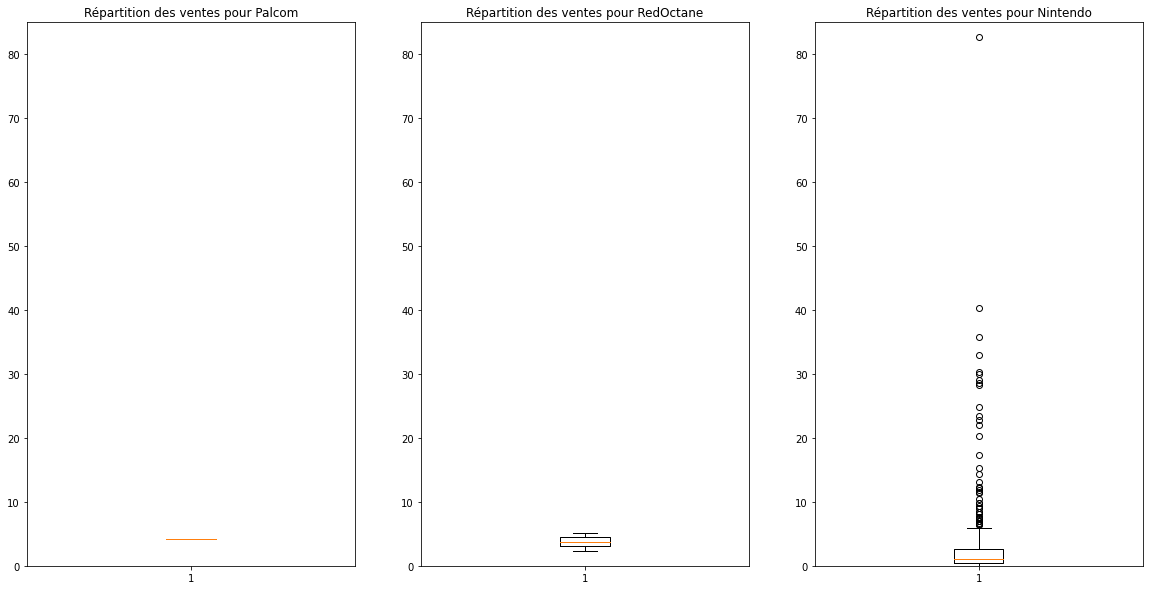

In [16]:
# Comparatif Palcom vs Nintendo

salesByPublisherG = df_visu.groupby('Publisher').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False).head(10)

# Palcom (Konami)
salesByPalcomGame = df_visu[df_visu['Publisher']=='Palcom']
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.ylim([0,85])
plt.boxplot(salesByPalcomGame['Global_Sales'])
#plt.bar(salesByPalcomGame['Name'],salesByPalcomGame['Global_Sales']);
plt.title('Répartition des ventes pour Palcom');

# RedOctane

salesByRedoctaneGame = df_visu[df_visu['Publisher']=='RedOctane']
plt.subplot(1,3,2)
plt.ylim([0,85])
plt.boxplot(salesByRedoctaneGame['Global_Sales'])
plt.title('Répartition des ventes pour RedOctane');

# Nintendo

salesByNintendoGame = df_visu[df_visu['Publisher']=='Nintendo']
plt.subplot(1,3,3)
plt.ylim([0,85])
#plt.plot(salesByNintendoGame['Name'],salesByNintendoGame['Global_Sales']);
#plt.plot(salesByNintendoGame['Global_Sales'].mean(),c='red');
plt.boxplot(salesByNintendoGame['Global_Sales'])
plt.title('Répartition des ventes pour Nintendo');

#salesByNintendoGame.info()
#print(len(df[df['Publisher']=='Nintendo']))
#df[df['Publisher']=='Nintendo']

In [30]:
salesByPalcomGame
salesByPalcomGame.mean()

Rank             277.00
Year            1989.00
NA_Sales           3.38
EU_Sales           0.44
JP_Sales           0.31
Other_Sales        0.04
Global_Sales       4.17
metaNote          44.00
metaNbVote        49.00
userNote           5.50
userNbVote       179.00
samename           1.00
dtype: float64

In [23]:
print(len(salesByRedoctaneGame))
salesByRedoctaneGame

2


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metaNote,metaNbVote,userNote,userNbVote,samename
195,196,Guitar Hero II,PS2,2006.0,Misc,RedOctane,3.81,0.63,0.00,0.68,5.12,92,69,8.5,156,1
656,658,Guitar Hero,PS2,2005.0,Misc,RedOctane,1.67,0.61,0.03,0.07,2.38,91,65,8.6,209,1


In [29]:
print(len(salesByNintendoGame))
print(salesByNintendoGame.mean())
salesByNintendoGame.head(50)

474
Rank            3147.067511
Year            1991.725738
NA_Sales           1.344937
EU_Sales           0.695654
JP_Sales           0.630675
Other_Sales        0.165907
Global_Sales       2.837405
samename           1.000000
dtype: float64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metaNote,metaNbVote,userNote,userNbVote,samename
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76,51,8.1,453,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,84,14,8.5,98,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82,73,8.4,1047,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80,73,8.2,293,1
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,83,27,8.2,258,1
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,80,70,7.0,306,1
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58,41,6.5,168,1
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,87,80,8.3,814,1
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0,4,0,0,1
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,83,54,7.6,121,1


In [ ]:
"""On constate que malgré le nombre de vente élevé de l'éditeur Nintendo, sa moyenne (2,83) se situe en dessous que des concurrents tels que Palcom et RedOctane
Ainsi, nous chercherons à définir quels sont les Best Sellers de Nintendo et de trouver une combinaison plateforme/genre/titre gagnante """

In [38]:
salesByGenre_global = df_visu.groupby('Genre')\
.agg({'Global_Sales':'mean','NA_Sales':'mean','EU_Sales':'mean','JP_Sales':'mean','Other_Sales':'mean','Global_Sales':'mean'})\
.sort_values(by='Global_Sales',ascending=False)

liste_genre=salesByGenre_global.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,15))
barWidth = 0.1
x1=nb_genre
x2=[barWidth + num for num in x1]
x3=[barWidth + num for num in x2]
x4=[barWidth + num for num in x3]
x5=[barWidth + num for num in x4]

sns.barplot(x=salesByGenre_global.Global_Sales,y=x1)

#plt.bar(x1,salesByGenre_global.Global_Sales, label="Global",width=barWidth)
#plt.bar(x2,salesByGenre_global.NA_Sales, label="Amerique Nord",width=barWidth)
#plt.bar(x3,salesByGenre_global.EU_Sales, label="Europe",width=barWidth)
#plt.bar(x4,salesByGenre_global.JP_Sales, label="Japon",width=barWidth)
#plt.bar(x5,salesByGenre_global.Other_Sales, label="Reste du monde",width=barWidth)

plt.xlabel('Genre',fontsize=20)
plt.ylabel('Ventes',fontsize=20)
plt.xticks(range(12), liste_genre,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Total des ventes par genre et par region ', fontsize=30)
plt.legend(fontsize=20);

TypeError: 'int' object is not iterable

<Figure size 2160x1080 with 0 Axes>

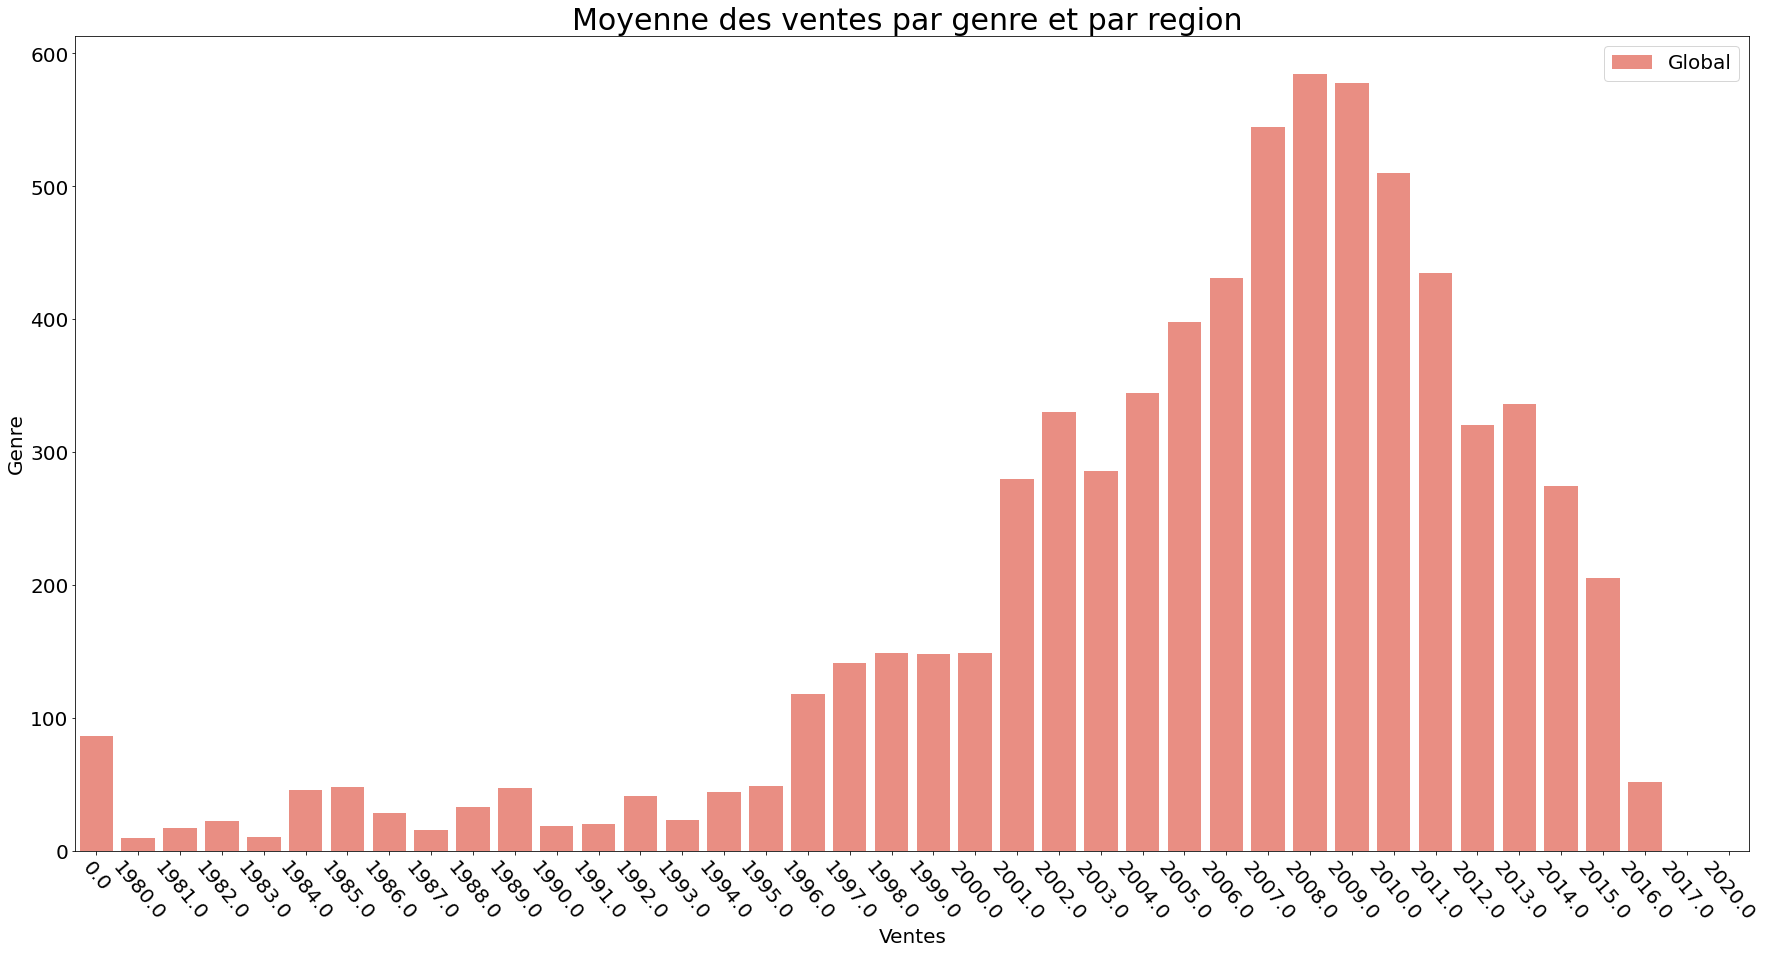

In [96]:
salesByYear = df_visu.groupby('Year')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Year',ascending=True)\
.reset_index()

liste_genre=salesByGenre_global.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,15))
columns=salesByGenre_global.columns.drop(['Genre'])

sns.barplot(data=salesByYear, x='Year', y='Global_Sales',color='salmon',label='Global')

plt.ylabel('Genre',fontsize=20)
plt.xlabel('Ventes',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=-50)
plt.title('Moyenne des ventes par genre et par region ', fontsize=30)
plt.legend(fontsize=20);

Somme Global :  7178.559999999975
Somme NA :  3710.639999999995 , Pourcentage :  51.69058975616291 %
Somme EU :  2053.049999999994 , Pourcentage :  28.599747024472887 %
Somme JP :  727.59 , Pourcentage :  10.135598225828058 %
Somme Other :  683.8900000000018 , Pourcentage :  9.526841037756935 %


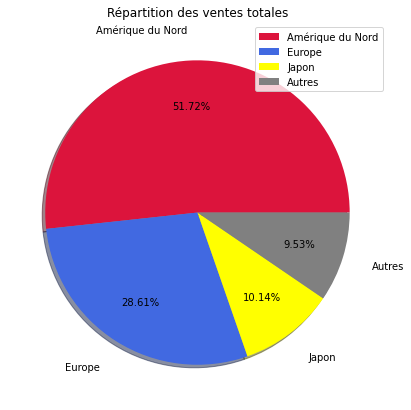

In [38]:
salesByPlatform = df_visu.groupby('Platform')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)\
.reset_index()

salesByPlatform['NA_Pourcentage']=salesByPlatform['NA_Sales']/salesByPlatform['Global_Sales']*100

print("Somme Global : ",salesByPlatform['Global_Sales'].sum())
print("Somme NA : ",salesByPlatform['NA_Sales'].sum(),", Pourcentage : ",salesByPlatform['NA_Sales'].sum()/salesByPlatform['Global_Sales'].sum()*100,"%")
print("Somme EU : ",salesByPlatform['EU_Sales'].sum(),", Pourcentage : ",salesByPlatform['EU_Sales'].sum()/salesByPlatform['Global_Sales'].sum()*100,"%")
print("Somme JP : ",salesByPlatform['JP_Sales'].sum(),", Pourcentage : ",salesByPlatform['JP_Sales'].sum()/salesByPlatform['Global_Sales'].sum()*100,"%")
print("Somme Other : ",salesByPlatform['Other_Sales'].sum(),", Pourcentage : ",salesByPlatform['Other_Sales'].sum()/salesByPlatform['Global_Sales'].sum()*100,"%")

plt.figure(figsize=(7,7))
x = [salesByPlatform['NA_Sales'].sum(), 
     salesByPlatform['EU_Sales'].sum(),
     salesByPlatform['JP_Sales'].sum(),
    salesByPlatform['Other_Sales'].sum()]
plt.pie(x, 
        labels=['Amérique du Nord','Europe','Japon','Autres'],
        colors=['crimson','royalblue','yellow','gray'],
        explode=[0,0,0,0],
        autopct='%.2f%%',
        pctdistance=0.7,
        labeldistance=1.2,
        shadow=True
       )
plt.title("Répartition des ventes totales");
plt.legend();


In [3]:
#salesByGenre_global['Total'] = salesByGenre_global['NA_Sales']+salesByGenre_global['EU_Sales']+salesByGenre_global['JP_Sales']+salesByGenre_global['Other_Sales']
#salesByGenre_global

salesByYear_global

df_visu[df_visu['Year']==2009].head(10)

NameError: name 'salesByYear_global' is not defined